In [1]:
!pip3 install slackclient
!pip3 install scrapethat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=1bee30925854cafa5784dc87fcba2514642055e855581a5ed9001b0f32220adb
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


# Send message

In [4]:
from slack import WebClient

# Initialize the Slack API client with your OAuth token
slack_token = ""
client = WebClient(token=slack_token)

# Define the channel and the message you want to send
channel = "#"  # Replace with the name of your channel or its ID
message = "Hello, I am a robot!"

# Send the message to the specified channel
response = client.chat_postMessage(channel=channel, text=message)

# Check if the message was sent successfully
if response["ok"]:
    print(f"Message sent to {channel}: {message}")
else:
    print(f"Failed to send the message: {response['error']}")

Message sent to #recapchannel: Hello, I am a robot!


# Send plot

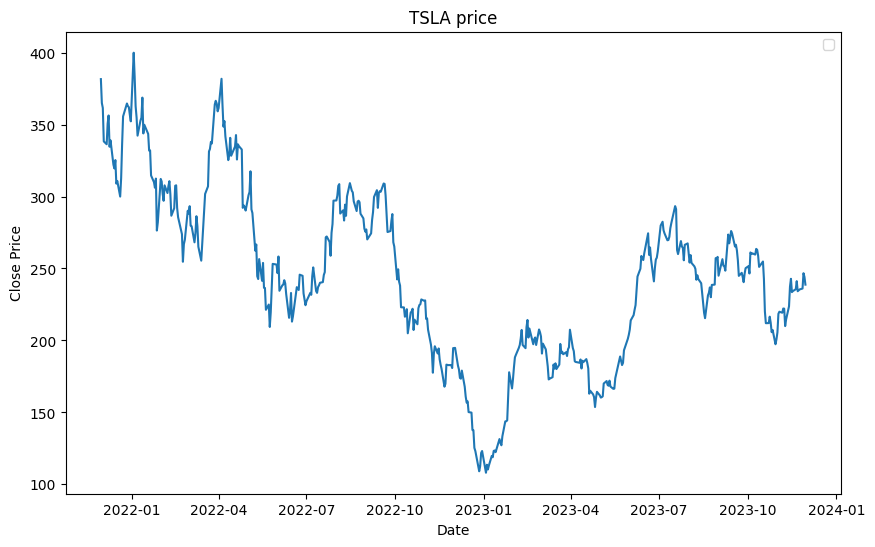

In [5]:
# create a plot of TSLA close price of last year
from scrapethat import *
from plotnine import *
def get_olhc(ticker, range='2y', interval='1d' ):
    try:

        scraper = cloudscraper.create_scraper()
        response = scraper.get(f"https://query1.finance.yahoo.com/v8/finance/chart/{ticker}?interval={interval}&range={range}")
        t= response.json()
        df = pd.DataFrame(t['chart']['result'][0]['indicators']['quote'][0])
        df['date'] = pd.to_datetime(t['chart']['result'][0]['timestamp'], unit='s').date
        df = df[['date', 'open', 'low', 'high', 'close', 'volume']]
        df['name']= ticker
        return(df)

    except:
        print('error')
        pass


df = get_olhc('TSLA')

import matplotlib.pyplot as plt
# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'])

plt.title('TSLA price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Save the plot as a PNG file
plt.savefig('tsla.png')

# Show the plot (optional)
plt.show()


In [7]:
image_path = "tsla.png"

channel = "#"

# Post the image
response = client.files_upload(
    channels=channel,
    file=image_path,
    title="TSLA",
    initial_comment="Tsla price:",
)

# Check if the image was posted successfully
if response["ok"]:
    print(f"Image posted to {channel}")
else:
    print(f"Failed to post the image: {response['error']}")


Image posted to #recapchannel


# Post file

In [8]:
import plotly.express as px

fig = px.line(df, x='date', y='close', title='TSLA Price')  # Add line_group to treat all data points as a single line

# Save the plot as an HTML file
fig.write_html('tsla.html')

# Display the plot (optional)
fig.show()

In [9]:
# Define the channel where you want to post the HTML document
channel = "#"  # Replace with the name of your channel or its ID

# Define the file path to the HTML document
html_document_path = "tsla.html"

# Post the HTML document
response = client.files_upload(
    channels=channel,
    file=html_document_path,
    title="HTML Document Title",
    initial_comment="Here's an HTML document:",
)

# Check if the document was posted successfully
if response["ok"]:
    print(f"HTML document posted to {channel}")
else:
    print(f"Failed to post the HTML document: {response['error']}")


HTML document posted to #recapchannel
